## odszumianie od Klaudi na tydzień do odszumiania

In [1]:
using FFTW
using Plots
using WAV

In [2]:
dt = 0.001
start = 0
stop = 1
t = LinRange(start, stop, Int((stop - start)/dt))
f = sin.(2π * 50t) + sin.(2π * 120t)
f_clean = f
f_noisy = f + 2.5 * randn(length(t))

1000-element Array{Float64,1}:
  5.613268924349294
  2.197286274057837
 -0.7331384384987971
  1.081662860021763
  0.7674187911882648
 -0.915505002393624
 -1.7278715717556854
  2.431329172586847
  5.927337131605862
  1.1934644106845527
  0.6157580594573411
  3.359996021040495
 -1.5926999141551104
  ⋮
 -1.2452912795040207
  0.6237006977892858
 -0.22208822383615978
 -1.1693313201012014
 -1.0124070989153162
 -1.2702347226995276
 -4.054661903461042
  0.8892027037646606
 -6.140506794232138
 -2.8884802522480344
 -2.1264362195714344
  0.1617970481134633

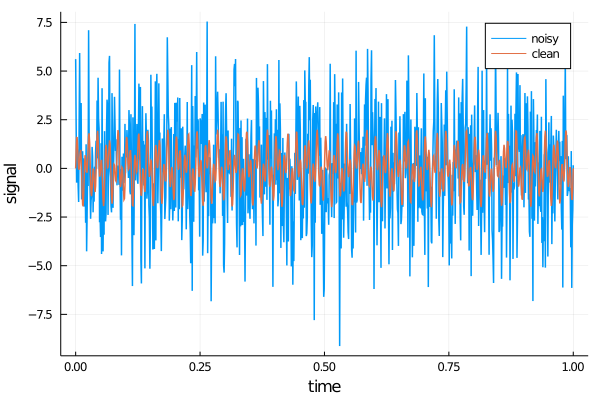

In [3]:
plot(t, f_noisy, linewidth = 1.5, label = "noisy", xlabel = "time", ylabel = "signal")
plot!(t, f_clean, linewidth = 1.5, label = "clean")

In [4]:
n = length(t)
fhat = fft(f_noisy)
PSD = real(fhat .* conj(fhat)/n) #power spectral density
freq = 1/(dt * n) * [i for i in 1:n]
L = [i for i in 1:Int(n/2)] #bierzemy połowę

500-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 489
 490
 491
 492
 493
 494
 495
 496
 497
 498
 499
 500

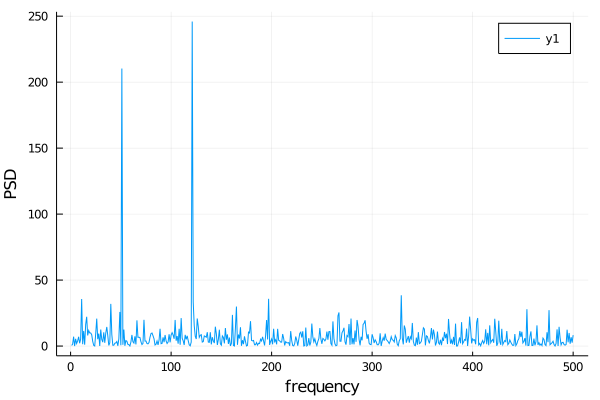

In [5]:
plot(freq[L], PSD[L], xlabel = "frequency", ylabel = "PSD")

In [6]:
indices = [i > 100 for i in PSD]
PSD_clean = indices .* PSD
fhat_clean = indices .* fhat
filtered = ifft(fhat_clean)
filtered_fft = fft(filtered)

1000-element Array{Complex{Float64},1}:
  1.7763568394002505e-14 + 3.944304526105059e-31im
 -1.3643148639147718e-31 - 7.926992362578282e-32im
  1.9005282132883206e-15 + 1.7552983016719767e-15im
   5.014029138083849e-31 + 5.965720109955903e-31im
   8.341971137252573e-32 + 1.868570944100978e-31im
   6.061236161425978e-15 + 8.932139621139372e-15im
  -7.876951005100757e-16 + 1.4916808440017985e-15im
 -1.1856160045655158e-31 - 1.0843590584670296e-32im
                     0.0 + 0.0im
  1.0011072841642183e-31 - 3.8782670904097736e-31im
 -2.7533531010703882e-14 + 4.440892098500626e-15im
  3.3138883694681907e-32 - 7.922995097468887e-32im
   5.276931379154325e-32 + 3.5187231979429907e-31im
                         ⋮
  1.6729031974552835e-31 - 4.983206673351622e-31im
   5.850267776141811e-31 - 9.8229640251032e-32im
  -3.273293304235022e-16 - 2.4827277023204648e-15im
  -1.670169234717384e-31 - 2.624761977652272e-31im
                     0.0 + 0.0im
  1.5326549455013107e-31 + 4.203466325258697e-3

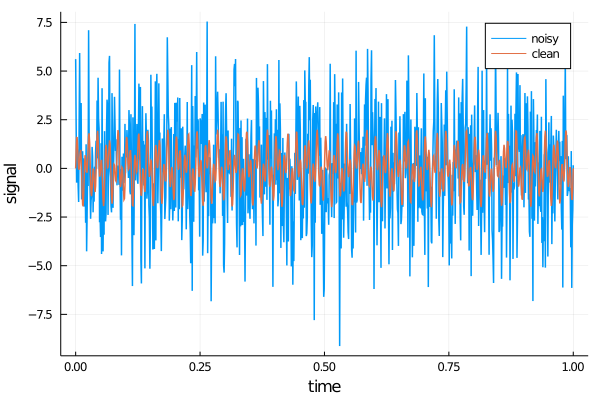

In [7]:
plot(t, f_noisy, linewidth = 1.5, label = "noisy", xlabel = "time", ylabel = "signal")
plot!(t, f_clean, linewidth = 1.5, label = "clean")

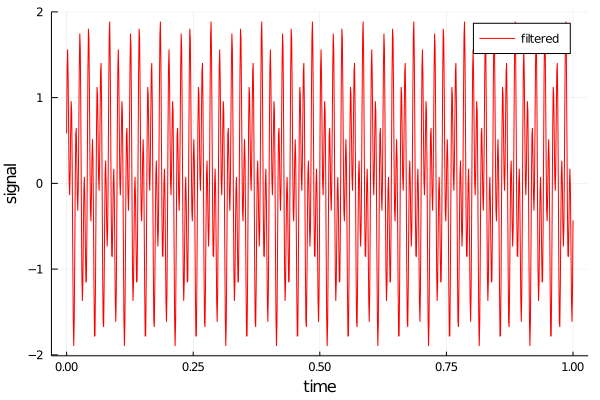

In [8]:
plot(t, real(filtered), color = :red, label = "filtered", xlabel = "time", ylabel = "signal")

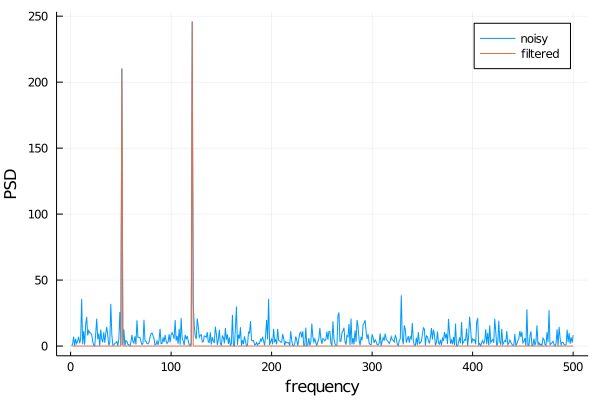

In [9]:
plot(freq[L], PSD[L], label = "noisy", xlabel = "frequency", ylabel = "PSD")
plot!(freq[L], PSD_clean[L], label = "filtered")

## Zmiana głośności

In [11]:
wavplay("440Hz.wav")
sound = wavread("440Hz.wav") 
sound_fft = 0.1 .* fft(sound[1][:, 1])
sound_ifft = real.(ifft(sound_fft))
wavplay(sound_ifft, sound[2])
wavplay("440Hz.wav")

LoadError: [91mUndefVarError: sound not defined[39m